## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

# turn the categories into dummy values so regression can recognize them
tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")

#drop the old versions of the columns
boston_features = boston_features.drop(["RAD","TAX"], axis=1)

#add the new columns to our dataframe
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

#drop the NOX column because it gives us multicolinearity problems.
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

<Figure size 1152x1152 with 0 Axes>

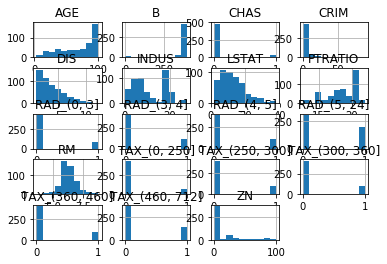

In [2]:
fig = plt.figure(figsize=(16,16))
boston_features.hist()
plt.show()

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [9]:
#log the columns we want to use to make them more normal
boston_features["AGE"] = np.log(boston_features["AGE"])
boston_features["DIS"] = np.log(boston_features["DIS"])
boston_features["LSTAT"] = np.log(boston_features["LSTAT"])
boston_features["PTRATIO"] = np.log(boston_features["PTRATIO"])
boston_features["INDUS"] = np.log(boston_features["INDUS"])

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


<Figure size 1152x1152 with 0 Axes>

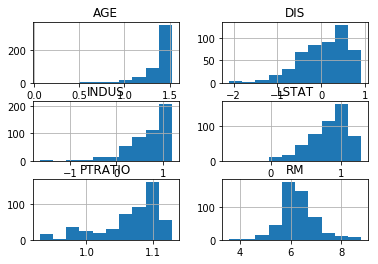

In [10]:
#make sure things look better
fig = plt.figure(figsize=(16,16))
boston_features[['AGE','DIS','INDUS','LSTAT','PTRATIO','RM']].hist()
plt.show()

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [8]:
#check out what values come up the most
boston_features.ZN.value_counts().head()

0.0     372
20.0     21
80.0     15
12.5     10
22.0     10
Name: ZN, dtype: int64

In [12]:
boston_features["ZN"] = np.log(boston_features["ZN"])
boston_features["ZN"].describe()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    506.000000
mean           -inf
std             NaN
min            -inf
25%            -inf
50%            -inf
75%        2.525729
max        4.605170
Name: ZN, dtype: float64

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.